In [1]:
## charger le dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# charger le dataset
titanic = pd.read_csv("6_train.csv")

# afficher les 5 premiers lignes
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#nombre total de passager 
print("nombre total de passager : ",titanic.shape[0])

#nombre de survivant
survived = titanic[titanic['Survived'] == 1]
print("nombre de survivant : ",survived.shape[0])

#calcul de proportion 
proportion = survived.shape[0]/titanic.shape[0]
print("proportion : ",proportion)

#les colonnes avec des valeurs manquantes 
missing_values = titanic.isnull().sum()
print("les colonnes avec des valeurs manquantes :\n",missing_values)

#le pourcentage des valeurs manquantes
missing_percentage = titanic.isnull().sum() / titanic.shape[0]
print("le pourcentage des valeurs manquantes :\n",missing_percentage[missing_percentage > 0])


nombre total de passager :  891
nombre de survivant :  342
proportion :  0.3838383838383838
les colonnes avec des valeurs manquantes :
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
le pourcentage des valeurs manquantes :
 Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64


In [3]:
#Imputez les valeurs manquantes Age par la médiane, Embarked par la modalité la plus fréquente
reformated_data = titanic.copy()
reformated_data['Age'] = titanic['Age'].fillna(titanic['Age'].median())
reformated_data['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])


#supprimer les colonnes : PassengerId , Name , Ticket , Cabin
reformated_data = reformated_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

#Ajout de la colonne title
# Extraction des titres
reformated_data['Title'] = titanic['Name'].str.extract('(Mr|Mrs|Miss|Master|Dr|Rev|Col|Major|Sir|Don|Lady|Countess|Jonkheer|Capt|Ms|Mme|Mlle)')
reformated_data['Title'] = reformated_data['Title'].fillna('Other')

print(reformated_data.groupby('Title').size())

# print(reformated_data[reformated_data['Title']== 'Capt'])

Title
Capt          1
Col          10
Countess      1
Don           1
Dr           10
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        180
Mlle          2
Mme           1
Mr          631
Ms            1
Rev           6
Sir           3
dtype: int64


In [4]:
from sklearn.preprocessing import LabelEncoder
#Encodez les variables catégorielles ( Sex, Embarked, Title ) à l’aide de LabelEncoder 
encodeur = LabelEncoder()
reformated_data['Sex'] = encodeur.fit_transform(reformated_data['Sex'])
reformated_data['Embarked'] = encodeur.fit_transform(reformated_data['Embarked'])
reformated_data['Title'] = encodeur.fit_transform(reformated_data['Title'])

print(reformated_data.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title
0         0       3    1  22.0      1      0   7.2500         2     12
1         1       1    0  38.0      1      0  71.2833         0     12
2         1       3    0  26.0      0      0   7.9250         2      9
3         1       1    0  35.0      1      0  53.1000         2     12
4         0       3    1  35.0      0      0   8.0500         2     12


In [5]:
#Standardisez Age et Fare avec StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
reformated_data['Age'] = scaler.fit_transform(reformated_data[['Age']])
reformated_data['Fare'] = scaler.fit_transform(reformated_data[['Fare']])

In [6]:
from sklearn.model_selection import train_test_split

## Séparation des données en jeu d'entraînement/test
X_train, X_test, y_train, y_test = train_test_split(
    # stratify=reformated_data['Survived'], #pour garder les proportions de classes similaires dans train/test
    reformated_data.drop('Survived', axis=1), 
    reformated_data['Survived'], 
    random_state=42
)


print(f"Taille de l'ensemble d'entraînement : {X_train.shape[0]} échantillons")
print(f"Taille de l'ensemble de test : {X_test.shape[0]} échantillons")
print(f"Proportion de survie dans l'entraînement : {y_train.mean():.2%}")
print(f"Proportion de survie dans le test : {y_test.mean():.2%}")

Taille de l'ensemble d'entraînement : 668 échantillons
Taille de l'ensemble de test : 223 échantillons
Proportion de survie dans l'entraînement : 37.87%
Proportion de survie dans le test : 39.91%


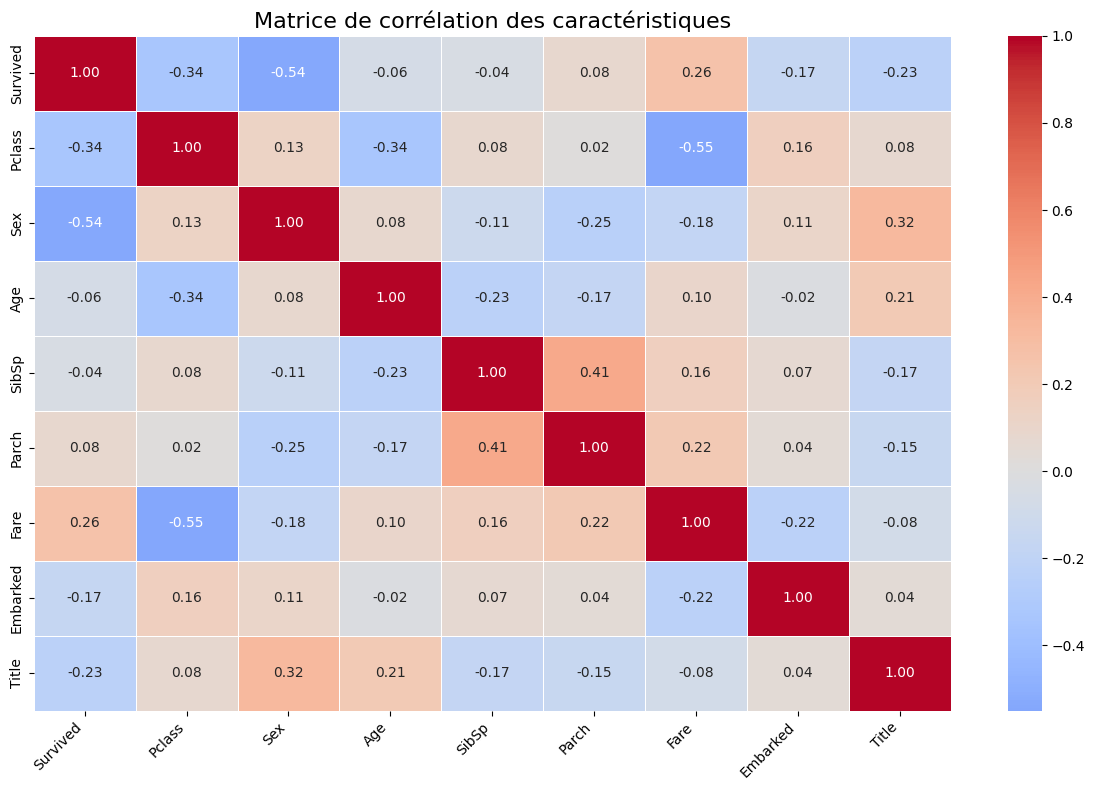


Corrélations avec Survived :
Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.064910
Embarked   -0.167675
Title      -0.234564
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcul de la matrice de corrélation
correlation_matrix = reformated_data.corr(numeric_only=True)

# Création de la heatmap
plt.figure(figsize=(12, 8))
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Pour ne montrer que la moitié inférieure
sns.heatmap(correlation_matrix, 
            # mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt=".2f",
            linewidths=0.5)

plt.title('Matrice de corrélation des caractéristiques', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Afficher les corrélations avec Survived par ordre décroissant
survived_corr = correlation_matrix['Survived'].sort_values(ascending=False)
print("\nCorrélations avec Survived :")
print(survived_corr)

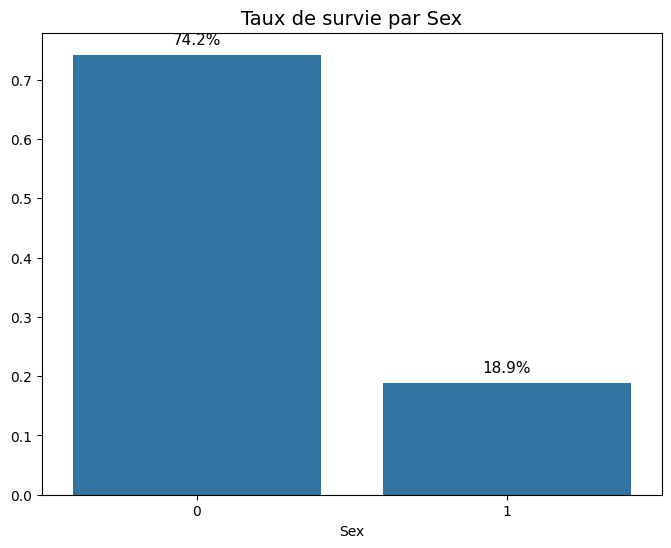

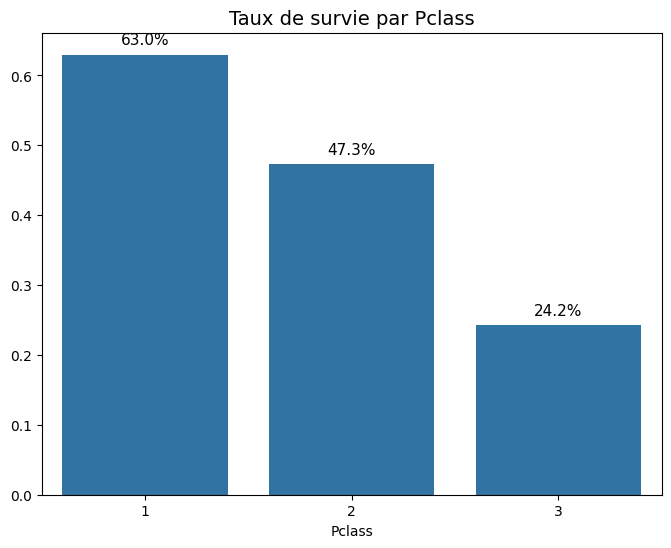

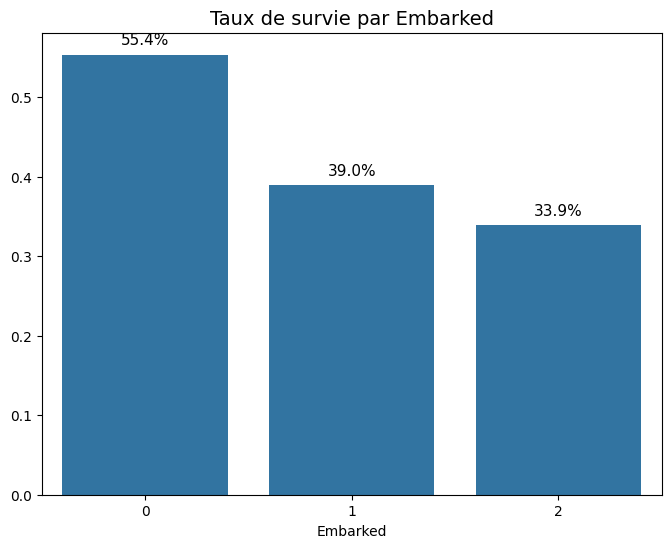

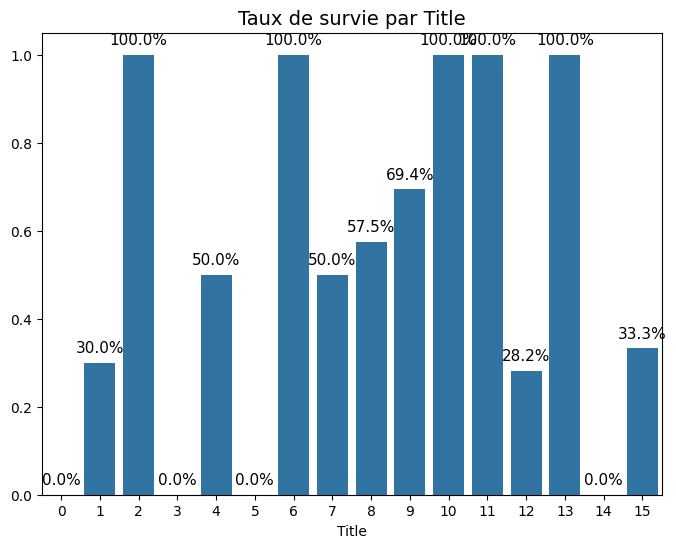

In [8]:
def plot_survival_rate_by(feature, df):
    plt.figure(figsize=(8, 6))
    survival = df.groupby(feature)['Survived'].mean().sort_values(ascending=False)
    ax = sns.barplot(x=survival.index, y=survival.values)
    plt.title(f'Taux de survie par {feature}', fontsize=14)
    # plt.ylim(0, 1)
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.1%}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom', fontsize=11, color='black',
            xytext=(0, 5), textcoords='offset points'
        )
    plt.show()

plot_survival_rate_by('Sex', reformated_data)
plot_survival_rate_by('Pclass', reformated_data)
plot_survival_rate_by('Embarked', reformated_data)
plot_survival_rate_by('Title', reformated_data)



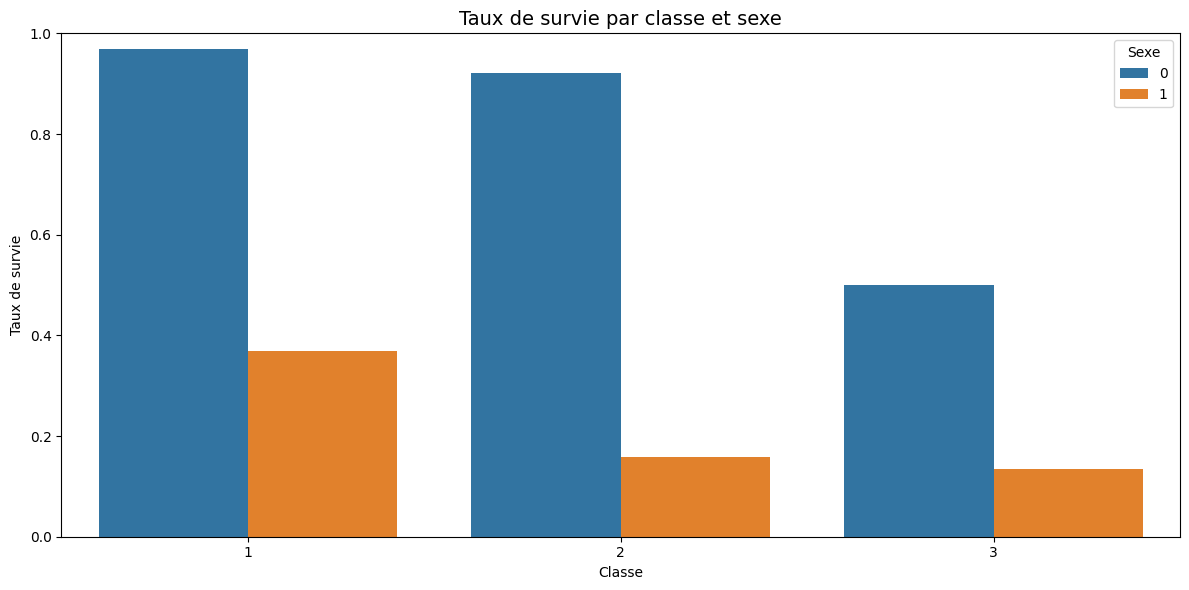

In [9]:
# Analyse plus détaillée : taux de survie par sexe et classe
plt.figure(figsize=(12, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=reformated_data, errorbar=None)
plt.title('Taux de survie par classe et sexe', fontsize=14)
plt.ylabel('Taux de survie')
plt.xlabel('Classe')
plt.ylim(0, 1)
plt.legend(title='Sexe')
plt.tight_layout()
plt.show()

Conclusion : femme plus de chance de survie

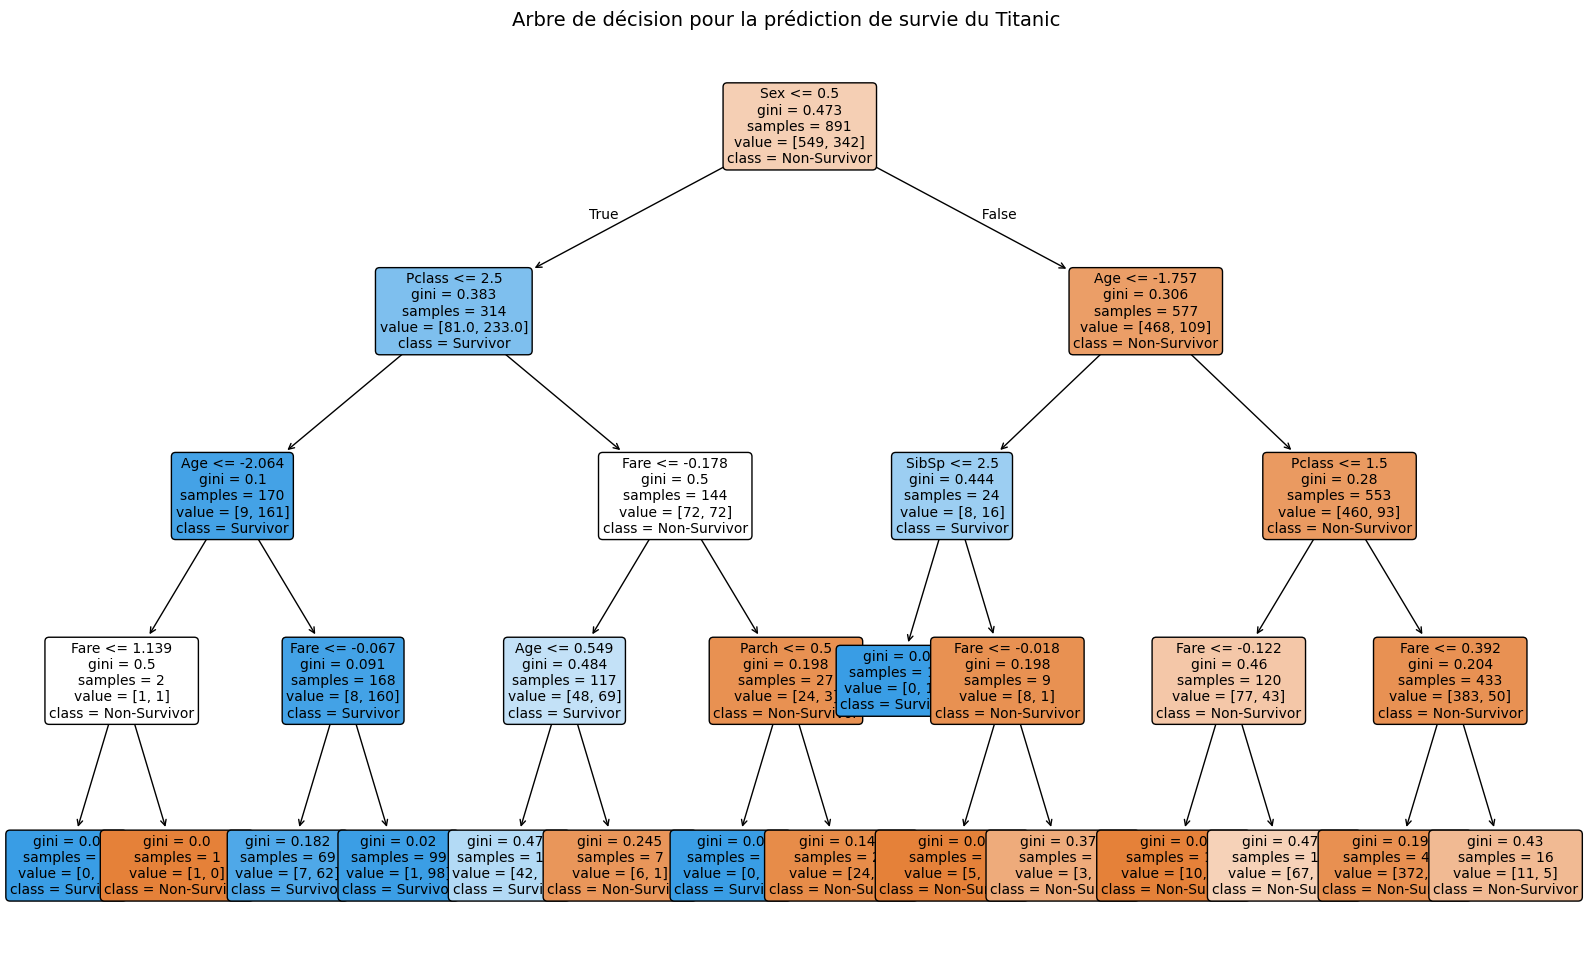

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd

# Encodage des variables catégorielles si nécessaire
# (à exécuter uniquement si ce n'est pas déjà fait)
le = LabelEncoder()
categorical_cols = ['Sex', 'Embarked', 'Title']
for col in categorical_cols:
    reformated_data[col] = le.fit_transform(reformated_data[col])

# Séparation des caractéristiques et de la cible
X = reformated_data.drop('Survived', axis=1)
y = reformated_data['Survived']

# Création et entraînement du modèle
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_classifier.fit(X, y)

# Visualisation de l'arbre
plt.figure(figsize=(20, 12))
plot_tree(dt_classifier, 
          feature_names=X.columns, 
          class_names=['Non-Survivor', 'Survivor'],
          filled=True, 
          rounded=True,
        #   proportion=True,
          fontsize=10)
plt.title("Arbre de décision pour la prédiction de survie du Titanic", fontsize=14)
plt.show()

Accuracy      : 0.820627802690583
Précision     : 0.8266666666666667
Rappel        : 0.6966292134831461
F1-score      : 0.7560975609756098


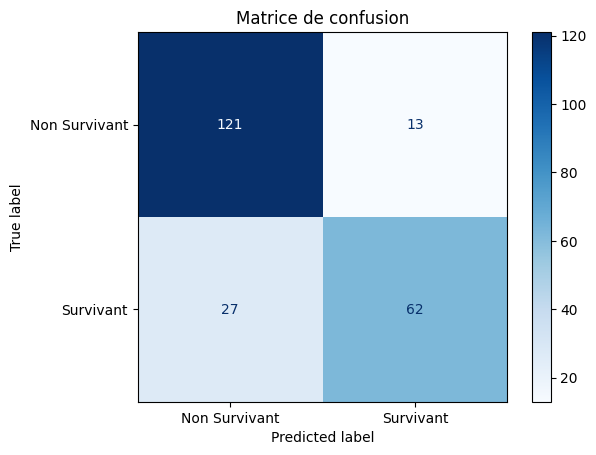

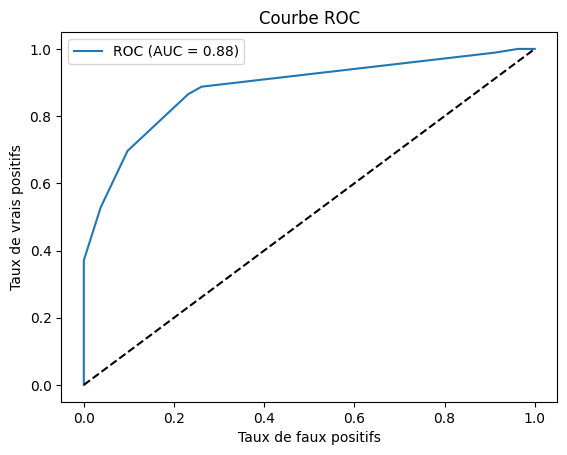

In [11]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    ConfusionMatrixDisplay
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    random_state=42
)

# 3. Prédictions et métriques
y_pred = dt_classifier.predict(X_test)
y_prob = dt_classifier.predict_proba(X_test)[:, 1]  # Pour la courbe ROC
# Métriques classiques
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy      : {acc}")
print(f"Précision     : {prec}")
print(f"Rappel        : {rec}")
print(f"F1-score      : {f1}")

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non Survivant", "Survivant"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matrice de confusion")
plt.show()

# 6. Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend()
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Prédictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Métriques
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("✅ Random Forest (100 arbres)")
print(f"Accuracy      : {acc}")
print(f"Précision     : {prec}")
print(f"Rappel        : {rec}")
print(f"F1-score      : {f1}")

✅ Random Forest (100 arbres)
Accuracy      : 0.8116591928251121
Précision     : 0.7640449438202247
Rappel        : 0.7640449438202247
F1-score      : 0.7640449438202247


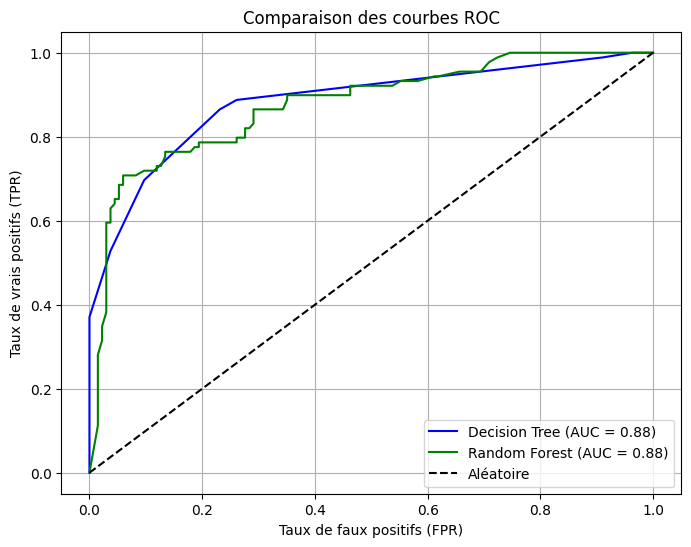

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Prédictions probabilistes
y_prob_tree = dt_classifier.predict_proba(X_test)[:, 1]  # Decision Tree
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Random Forest

# Calcul des courbes ROC
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Calcul des AUC
auc_tree = roc_auc_score(y_test, y_prob_tree)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Tracé des courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')

# Diagonale (cas aléatoire)
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire')

plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Comparaison des courbes ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()
